<a href="https://colab.research.google.com/github/andresbasilea/Analizador-Financiero-CS/blob/main/AndresBasile_CreditSuisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andrés José Basile Álvarez - Analizador De Estados Financieros

## Analizador de estados financieros de cualquier empresa.
### Se ingresa el nombre de la empresa y se hace web scraping en stockanalysis.com para obtener los estados financieros. A partir de ellos, se realiza un pequeño análisis.


###Fecha de realización: 26/09/21

In [2]:
!pip install beautifulsoup4
!pip install xlsxwriter

In [215]:
from bs4 import BeautifulSoup  # Web Scraping
import pandas as pd # Análisis de los datos
import matplotlib.pyplot as plt # Impresión de los datos (gráficas, ...)
import requests # Para obtener el contenido de la página web

In [18]:
#para descargar la hoja de cálculo generada
from google.colab import files

# ¡Bienvenido! 

### Ingresa el nombre de la empresa que deseas buscar: 




In [557]:
# Se permite al usuario ingresar una empresa (ejemplo: si se quiere Apple, se tiene que ingresar AAPL)
empresa = input()


CS


In [558]:

# LAS DIRECCIONES WEB DONDE SE ENCUENTRA LA INFORMACIÓN DE LOS ESTADOS FINANCIEROS 
direcciones = {}
direcciones['Income Statement'] = f"https://stockanalysis.com/stocks/{empresa}/financials/"
direcciones['Balance Sheet'] = f"https://stockanalysis.com/stocks/{empresa}/financials/balance-sheet/"
direcciones['Cash Flow'] = f"https://stockanalysis.com/stocks/{empresa}/financials/cash-flow-statement/"
direcciones['Ratios'] = f"https://stockanalysis.com/stocks/{empresa}/financials/ratios/"




In [560]:
# Se traen los datos, se almacenan en dataframes y además se crea un archivo de excel. 
with pd.ExcelWriter('estadosFinancieros' + empresa +'.xlsx',engine='xlsxwriter') as escritor: # Creación de una hoja de cálculo para exportar datos
    
    # para manejar cada DF por separado posteriormente.
    df = []
    dfIncome = pd.DataFrame()
    dfBalance = pd.DataFrame()
    dfCash = pd.DataFrame()
    dfRatios = pd.DataFrame()

    df.append(dfIncome)
    df.append(dfBalance)
    df.append(dfCash)
    df.append(dfRatios)


    i=0
    for estadoFinanciero in direcciones: #Ciclo for para traer los datos de cada tabla y guardarlos en excel
      datos = requests.get(direcciones[estadoFinanciero])
      soup = BeautifulSoup(datos.content, 'html.parser')
      df[i] = pd.read_html(str(soup),attrs={'id':'financial-table'})[0]
      df[i].index=df[i].index+1
      df[i]=df[i].rename(columns={'Year':'Concepto/Año'})
      df[i].to_excel(escritor, sheet_name=estadoFinanciero)
      i+=1


files.download('estadosFinancieros' + empresa +'.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análisis y reporte de datos obtenidos


## Estados Financieros:

In [561]:
print("\n\n\n\nIncome Statement")
df[0]






Income Statement


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Revenue,22389,22484,20920,20900,20323,23797,26242,25856,23611,25891
2,Revenue Growth,-0.42%,7.48%,0.10%,2.84%,-14.60%,-9.32%,1.49%,9.51%,-8.81%,-
3,Gross Profit,22389,22484,20920,20900,20323,23797,26242,25856,23611,25891
4,"Selling, General & Admin",16413,16164,15418,17012,20342,20120,20868,19843,19549,20294
5,Other Operating Expenses,1413,1276,1885,1885,1995,5775,1561,1750,1702,1939
6,Operating Expenses,17826,17440,17303,18897,22337,25895,22429,21593,21251,22233
7,Operating Income,4563,5044,3617,2003,-2014,-2098,3813,4263,2360,3658
8,Other Expense / Income,1093,330,232,245,255,323,533,661,546,1049
9,Pretax Income,3470,4714,3385,1758,-2269,-2421,3280,3602,1814,2609
10,Income Tax,801,1295,1361,2741,441,523,1405,1276,465,656


In [562]:
print("\n\n\n\n Balance Sheet")

df[1]





 Balance Sheet


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Cash & Equivalents,140410,102620,101189,110541,121933,93195,80593,70207,63708,112845
2,Cash & Cash Equivalents,140410,102620,101189,110541,121933,93195,80593,70207,63708,112845
3,Cash Growth,36.83%,1.41%,-8.46%,-9.34%,30.84%,15.64%,14.79%,10.20%,-43.54%,-
4,Receivables,35941,35648,38907,46968,33431,34542,41629,52045,45768,43446
5,Other Current Assets,-176351,-138268,-140096,-157509,-155364,-127737,-122222,-122252,-109476,-156291
6,"Property, Plant & Equipment",0,0,0,4686,4711,4644,4641,5091,5618,7193
7,Goodwill and Intangibles,4663,4954,4985,4965,5126,5004,8893,8209,8632,8879
8,Other Long-Term Assets,-4663,-4954,-4985,-9651,-9837,-9648,-13534,-13300,-14250,-16072
9,Total Assets,805822,787295,768916,796289,819861,820805,921462,872806,924280,1049165
10,Accounts Payable,38076,42427,46143,58716,62652,60506,82986,96262,95690,108181


In [563]:
print("\n\n\n\nCash Flow")
df[2]






Cash Flow


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Net Income,2669,3419,2024,-983,-2710,-2944,1875,2326,1349,1953
2,Other Operating Activities,-9183,-21843,10859,-7539,29485,18012,-19495,19748,-14017,36669
3,Operating Cash Flow,-6514,-18424,12883,-8522,26775,15068,-17620,22074,-12668,38622
4,Operating Cash Flow Growth,-,-,-,-,77.69%,-,-,-,-,-
5,Capital Expenditures,-1143,-1263,-1065,-1067,-1109,-1089,-1055,-894,-1216,-1728
6,Acquisitions,-210,-285,-547,-1094,-1403,-594,-1264,-1792,-2039,-1782
7,Change in Investments,17914,-321,-6408,12806,-6190,35935,-8626,14083,42390,-22679
8,Other Investing Activities,113,543,342,65,749,409,606,122,3683,222
9,Investing Cash Flow,16674,-1326,-7678,10710,-7953,34661,-10339,11519,42818,-25967
10,Dividends Paid,-716,-696,-666,-590,-493,-427,-1252,-564,-1296,-1948


In [564]:
print("\n\n\n\nRatios")

df[3]






Ratios


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Market Capitalization,31184,34305,27696,37305,27926,34693,39901,40159,29971,27851
2,Market Cap Growth,-9.10%,23.87%,-25.76%,33.59%,-19.51%,-13.05%,-0.64%,33.99%,7.61%,-
3,Enterprise Value,140875,133973,148465,155784,191663,232521,236262,290494,307696,351588
4,PE Ratio,10.28,9.73,13.41,-36.99,-9.65,-11.77,21.14,15.41,20.33,13.40
5,PS Ratio,1.23,1.48,1.30,1.74,1.29,1.46,1.51,1.39,1.16,1.01
6,PB Ratio,0.64,0.76,0.62,0.87,0.62,0.78,0.90,0.85,0.77,0.78
7,P/FCF Ratio,-3.58,-1.69,2.30,-3.79,1.02,2.48,-2.12,1.69,-1.98,0.71
8,P/OCF Ratio,-4.21,-1.81,2.11,-4.27,0.98,2.30,-2.25,1.62,-2.16,0.68
9,EV/Sales Ratio,5.54,5.78,6.95,7.27,8.83,9.76,8.94,10.02,11.92,12.75
10,EV/EBITDA Ratio,35.73,27.57,42.98,86.40,-79.06,-95.95,71.53,71.94,155.20,126.54


## Market Cap.

2011    27851.0
2012    29971.0
2013    40159.0
2014    39901.0
2015    34693.0
2016    27926.0
2017    37305.0
2018    27696.0
2019    34305.0
2020    31184.0
Name: 1, dtype: float64


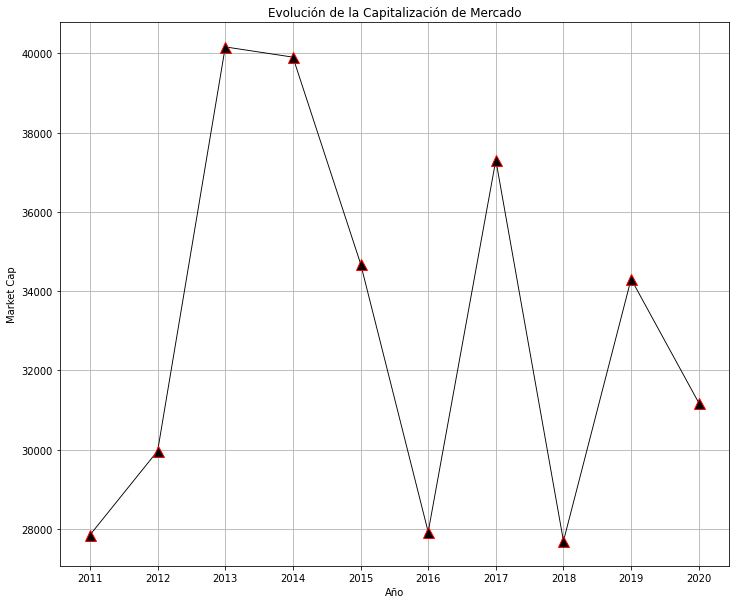

In [565]:
a = df[3].iloc[0,1:] #Información en RATIOS
a = a.astype(float)
a = a.iloc[::-1] #Cambiar el orden de los años para la gráfica
print(a[0:])
plt.figure(figsize=(12,10))
plt.title('Evolución de la Capitalización de Mercado')
plt.xlabel('Año')
plt.ylabel('Market Cap')
plt.grid(True)
plt.plot(a, linewidth=0.9, color='black', marker = '^', mec = "r", ms="11")


#Revenue Growth

[0.0, -8.81, 9.51, 1.49, -9.32, -14.6, 2.84, 0.1, 7.48, -0.42]


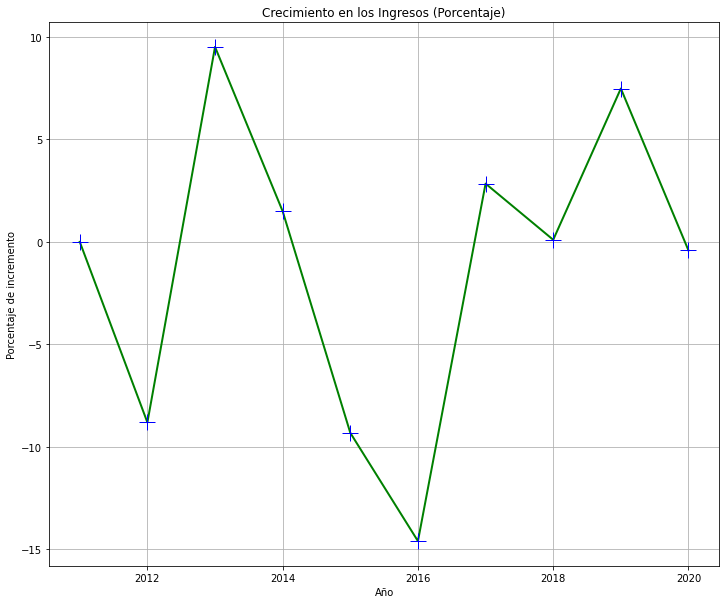

In [566]:
a = df[0].iloc[1,1:] # Ubicación de los datos en el estado financiero de Income Statement
a = a.iloc[::-1]
y = []
for x in a:
  if x == "-":
    x = "0" 
  x = x.rstrip("%")
  x = float(x)
  y.append(x)

anios = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] # Se hace esta tupla por si algún input de empresa no cuenta con todos los años (2011-2020)
print(y)
plt.figure(figsize=(12,10))
plt.title('Crecimiento en los Ingresos (Porcentaje)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de incremento')
plt.grid(True)
plt.plot(anios[0:len(y)],y, linewidth=2, color='green', marker = '+', mec = "b", ms="16")


#ROE, ROA, ROIC

ROE
 2020     6.20%
2019     7.80%
2018     4.70%
2017    -2.30%
2016    -6.30%
2015    -6.70%
2014     4.40%
2013     6.00%
2012     3.90%
2011     5.80%
Name: 16, dtype: object 

ROA
 2020     0.30%
2019     0.40%
2018     0.30%
2017    -0.10%
2016    -0.30%
2015    -0.30%
2014     0.20%
2013     0.30%
2012     0.10%
2011     0.20%
Name: 17, dtype: object 

ROIC
 2020     0.40%
2019     0.50%
2018     0.40%
2017     0.20%
2016    -0.20%
2015    -0.20%
2014     0.30%
2013     0.30%
2012     0.10%
2011     0.20%
Name: 18, dtype: object


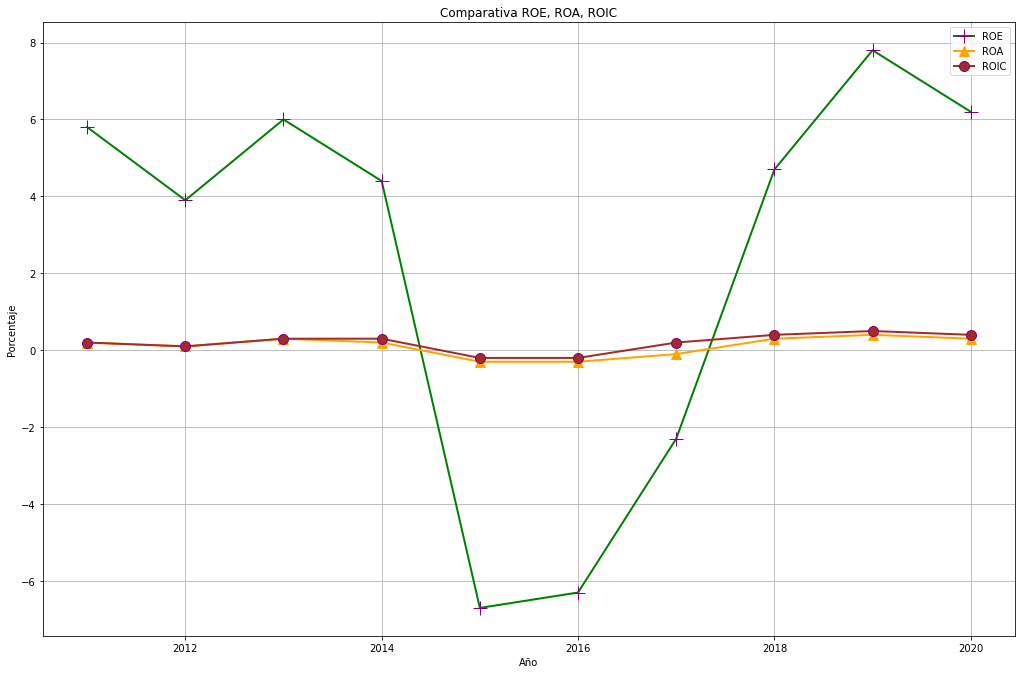

In [567]:
# Se ubican los datos en el dataframe
a = df[3].iloc[15,1:]
b = df[3].iloc[16,1:]
c = df[3].iloc[17,1:]

print("ROE\n",a, "\n\nROA\n",  b, "\n\nROIC\n", c)

a = a.iloc[::-1]
b = b.iloc[::-1]
c = c.iloc[::-1]

# Se limpian los datos del ROE.
x = []
for i in a:
  if i == "-":
    i = "0" 
  i = i.rstrip("%")
  i = float(i)
  x.append(i)

# Se limpian los datos del ROA.
y = []
for j in b:
  if j == "-":
    j = "0" 
  j = j.rstrip("%")
  j = float(j)
  y.append(j)

# Se limpian los datos del ROIC.
z = []
for k in c:
  if k == "-":
    k = "0" 
  k = k.rstrip("%")
  k = float(k)
  z.append(k)



anios = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] # Se hace este arreglo por si algún input de empresa no cuenta con todos los años (2011-2020)
plt.figure(figsize=(9,6))
plt.title('Comparativa ROE, ROA, ROIC')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.plot(anios[0:len(x)],x, linewidth=2, color='green', marker = '+', mec = "purple", ms="14")
plt.plot(anios[0:len(y)],y, linewidth=2, color='orange', marker = '^', mec = "orange", ms="10")
plt.plot(anios[0:len(z)],z, linewidth=2, color='brown', marker = 'o', mec = "purple", ms="10")
plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.6, hspace=0.6,wspace=0.3)
plt.legend(['ROE','ROA','ROIC'])